In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))


In [4]:
model.add(keras.layers.Dense(10,activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [6]:
optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,metrics=["accuracy"])

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [8]:
import os

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5",save_best_only=True)

run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_log", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [10]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs --port=6006

Reusing TensorBoard on port 6006 (pid 2864), started 0:20:50 ago. (Use '!kill 2864' to kill it.)

In [11]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16549731922312511031
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3142752667
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4586947970703211115
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [12]:
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
         callbacks=callbacks,use_multiprocessing=True, workers=8)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 18s 397us/sample - loss: 4.1080 - accuracy: 0.1669 - val_loss: 2.2234 - val_accuracy: 0.1922
Epoch 2/100
45000/45000 [==============================] - 14s 307us/sample - loss: 2.0740 - accuracy: 0.2455 - val_loss: 1.9972 - val_accuracy: 0.2780
Epoch 3/100
45000/45000 [==============================] - 14s 317us/sample - loss: 1.9492 - accuracy: 0.2894 - val_loss: 1.9535 - val_accuracy: 0.3014
Epoch 4/100
45000/45000 [==============================] - 14s 319us/sample - loss: 1.8656 - accuracy: 0.3206 - val_loss: 1.8267 - val_accuracy: 0.3382
Epoch 5/100
45000/45000 [==============================] - 15s 325us/sample - loss: 1.7994 - accuracy: 0.3474 - val_loss: 1.7737 - val_accuracy: 0.3558
Epoch 6/100
45000/45000 [==============================] - 14s 307us/sample - loss: 1.7557 - accuracy: 0.3644 - val_loss: 1.7442 - val_accuracy: 0.3714
Epoch 7/100
45000/45000 [==============

45000/45000 [==============================] - 14s 315us/sample - loss: 1.1666 - accuracy: 0.5788 - val_loss: 1.5705 - val_accuracy: 0.4696
Epoch 55/100
45000/45000 [==============================] - 15s 329us/sample - loss: 1.1619 - accuracy: 0.5824 - val_loss: 1.5841 - val_accuracy: 0.4576
Epoch 56/100
45000/45000 [==============================] - 14s 316us/sample - loss: 1.1515 - accuracy: 0.5851 - val_loss: 1.5715 - val_accuracy: 0.4730
Epoch 57/100
45000/45000 [==============================] - 14s 312us/sample - loss: 1.1512 - accuracy: 0.5844 - val_loss: 1.5792 - val_accuracy: 0.4602
Epoch 58/100
45000/45000 [==============================] - 14s 308us/sample - loss: 1.1393 - accuracy: 0.5887 - val_loss: 1.5564 - val_accuracy: 0.4638
Epoch 59/100
45000/45000 [==============================] - 14s 312us/sample - loss: 1.1378 - accuracy: 0.5905 - val_loss: 1.5643 - val_accuracy: 0.4684
Epoch 60/100
45000/45000 [==============================] - 13s 298us/sample - loss: 1.1281 - a

In [13]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

5000/5000 [==============================] - 1s 118us/sample - loss: 1.4945 - accuracy: 0.4766


[1.4945455801010132, 0.4766]

In [14]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100,kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [16]:
optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [17]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5",save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_log", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

with tf.device('/device:GPU:0'):
    model.fit(X_train,y_train, epochs=100,
             validation_data=(X_valid,y_valid),
             callbacks=callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 43s 957us/sample - loss: 1.8364 - accuracy: 0.3414 - val_loss: 1.6465 - val_accuracy: 0.4138
Epoch 2/100
45000/45000 [==============================] - 34s 755us/sample - loss: 1.6652 - accuracy: 0.4062 - val_loss: 1.6149 - val_accuracy: 0.4180
Epoch 3/100
45000/45000 [==============================] - 33s 744us/sample - loss: 1.5981 - accuracy: 0.4303 - val_loss: 1.5207 - val_accuracy: 0.4578
Epoch 4/100
45000/45000 [==============================] - 34s 749us/sample - loss: 1.5432 - accuracy: 0.4525 - val_loss: 1.4723 - val_accuracy: 0.4674
Epoch 5/100
45000/45000 [==============================] - 33s 738us/sample - loss: 1.5009 - accuracy: 0.4660 - val_loss: 1.4800 - val_accuracy: 0.4732
Epoch 6/100
45000/45000 [==============================] - 33s 741us/sample - loss: 1.4629 - accuracy: 0.4787 - val_loss: 1.4371 - val_accuracy: 0.4932
Epoch 7/100
45000/45000 [==============

In [18]:
model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

5000/5000 [==============================] - 1s 250us/sample - loss: 1.3126 - accuracy: 0.5414


[1.3125772806167602, 0.5414]

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="lecun_normal",
                                activation="selu"))
model.add(keras.layers.Dense(10,activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5",save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_logs","run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scale = (X_train - X_means) / X_stds
X_valid_scale = (X_valid - X_means) / X_stds
X_test_scale = (X_test - X_means) / X_stds

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [21]:
with tf.device('/device:GPU:0'):
    model.fit(X_train_scale,y_train, epochs=100,
             validation_data=(X_valid_scale,y_valid),
             callbacks=callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 17s 375us/sample - loss: 1.9134 - accuracy: 0.3092 - val_loss: 1.8427 - val_accuracy: 0.3426
Epoch 2/100
45000/45000 [==============================] - 14s 307us/sample - loss: 1.6943 - accuracy: 0.3994 - val_loss: 1.7828 - val_accuracy: 0.3838
Epoch 3/100
45000/45000 [==============================] - 14s 309us/sample - loss: 1.6050 - accuracy: 0.4354 - val_loss: 1.6301 - val_accuracy: 0.4270
Epoch 4/100
45000/45000 [==============================] - 14s 307us/sample - loss: 1.5352 - accuracy: 0.4638 - val_loss: 1.5933 - val_accuracy: 0.4572
Epoch 5/100
45000/45000 [==============================] - 14s 309us/sample - loss: 1.4781 - accuracy: 0.4819 - val_loss: 1.5639 - val_accuracy: 0.4440
Epoch 6/100
45000/45000 [==============================] - 14s 303us/sample - loss: 1.4337 - accuracy: 0.4986 - val_loss: 1.5439 - val_accuracy: 0.4680
Epoch 7/100
45000/45000 [==============

In [22]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scale,y_valid)

5000/5000 [==============================] - 1s 130us/sample - loss: 1.4565 - accuracy: 0.5048


[1.456472645187378, 0.5048]

In [23]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [25]:
model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 19s 415us/sample - loss: 1.8772 - accuracy: 0.3334 - val_loss: 1.7490 - val_accuracy: 0.3884
Epoch 2/100
45000/45000 [==============================] - 15s 331us/sample - loss: 1.6488 - accuracy: 0.4151 - val_loss: 1.8019 - val_accuracy: 0.4086
Epoch 3/100
45000/45000 [==============================] - 15s 335us/sample - loss: 1.5614 - accuracy: 0.4495 - val_loss: 1.7122 - val_accuracy: 0.4436
Epoch 4/100
45000/45000 [==============================] - 15s 335us/sample - loss: 1.4949 - accuracy: 0.4736 - val_loss: 1.6085 - val_accuracy: 0.4380
Epoch 5/100
45000/45000 [==============================] - 15s 337us/sample - loss: 1.4384 - accuracy: 0.4962 - val_loss: 1.5393 - val_accuracy: 0.4776
Epoch 6/100
45000/45000 [==============================] - 15s 335us/sample - loss: 1.3956 - accuracy: 0.5133 - val_loss: 1.5038 - val_accuracy: 0.4980
Epoch 7/100
45000/45000 [==============

In [26]:
model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

5000/5000 [==============================] - 1s 132us/sample - loss: 1.5038 - accuracy: 0.4980


[1.5037678070068359, 0.498]

In [28]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self,inputs):
        return super().call(inputs,training=True)

In [29]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [30]:
mc_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

In [31]:
def mc_dropout_predict_probas(mc_model, X, n_sample=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_sample)]
    return np.mean(Y_probas, axis=0)
def mc_dropout_predict_classes(mc_model, X, n_sample=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_sample)
    return np.argmax(Y_probas, axis=1)

In [32]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:,0])
accuracy

0.4984

In [40]:
y_valid[:,0]

array([6, 9, 9, ..., 5, 4, 6], dtype=uint8)

In [43]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

Train on 45000 samples
45000/45000 [==============================] - 3s 71us/sample - loss: nan - accuracy: 0.1388


(9.999999747378752e-06,
 9.999868392944336,
 2.0554909706115723,
 3.4577737535749167)

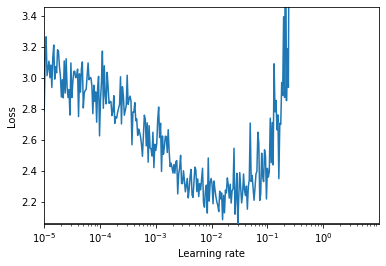

In [44]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [45]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [64]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [65]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [66]:
n_epochs = 30
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 4s 89us/sample - loss: 2.0599 - accuracy: 0.2796 - val_loss: 1.7734 - val_accuracy: 0.3662
Epoch 2/30
45000/45000 [==============================] - 3s 57us/sample - loss: 1.7774 - accuracy: 0.3703 - val_loss: 1.7073 - val_accuracy: 0.4020
Epoch 3/30
45000/45000 [==============================] - 3s 58us/sample - loss: 1.6450 - accuracy: 0.4177 - val_loss: 1.6178 - val_accuracy: 0.4252
Epoch 4/30
45000/45000 [==============================] - 3s 56us/sample - loss: 1.5586 - accuracy: 0.4474 - val_loss: 1.5579 - val_accuracy: 0.4502
Epoch 5/30
45000/45000 [==============================] - 3s 56us/sample - loss: 1.4985 - accuracy: 0.4721 - val_loss: 1.5526 - val_accuracy: 0.4566
Epoch 6/30
45000/45000 [==============================] - 3s 56us/sample - loss: 1.4479 - accuracy: 0.4878 - val_loss: 1.5596 - val_accuracy: 0.4590
Epoch 7/30
45000/45000 [==============================] -

In [67]:
model.evaluate(X_valid_scaled, y_valid)

5000/5000 [==============================] - 0s 96us/sample - loss: 2.2127 - accuracy: 0.5226


[2.212707152557373, 0.5226]

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1